In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Read data from file

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df.set_index("Year", inplace=True)
df.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN


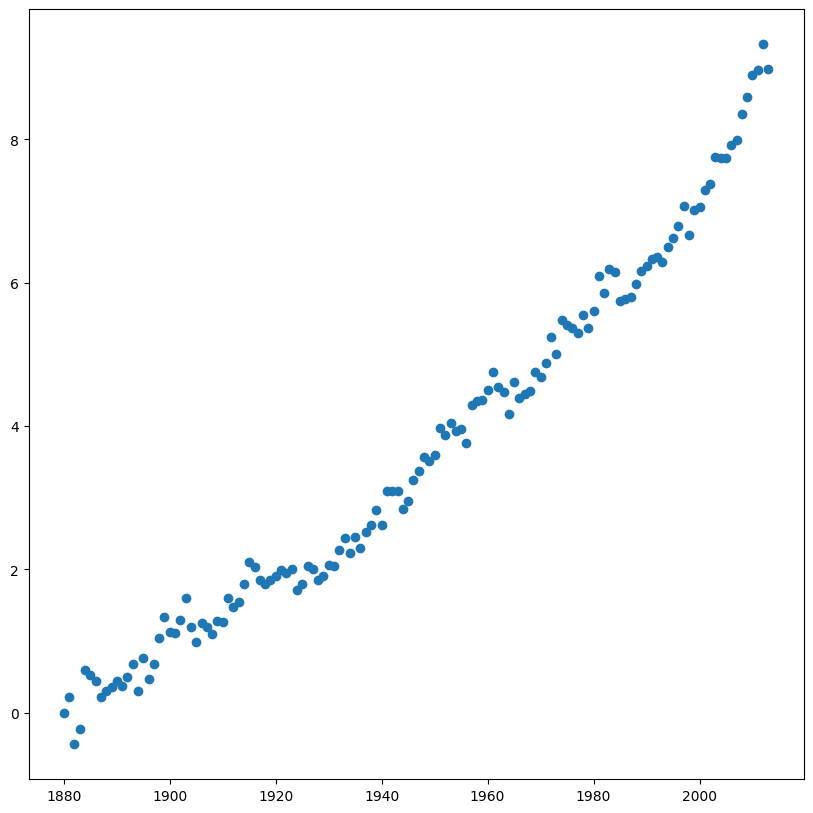

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df.index, df["CSIRO Adjusted Sea Level"])

Create first line of best fit

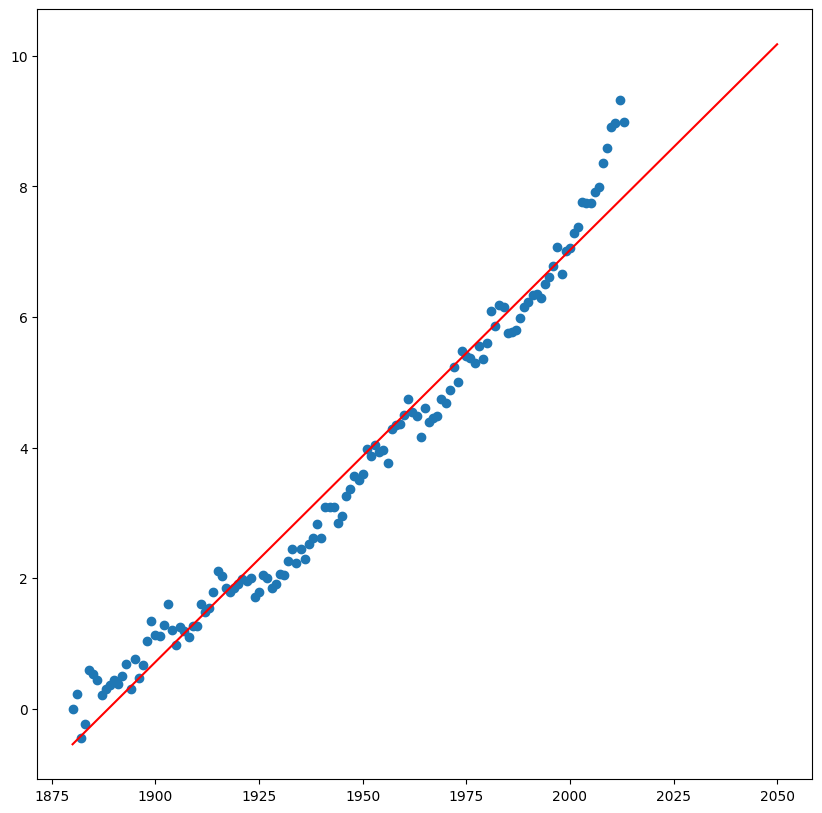

In [4]:
#Range going from the first year available to 2050
year_span1 = range(df.index[0], 2051, 1)
slope, intercept, r, p, se = linregress(df.index, df["CSIRO Adjusted Sea Level"])
ax.plot(year_span1, (intercept+slope*year_span1), "r")
fig

Create second line of best fit

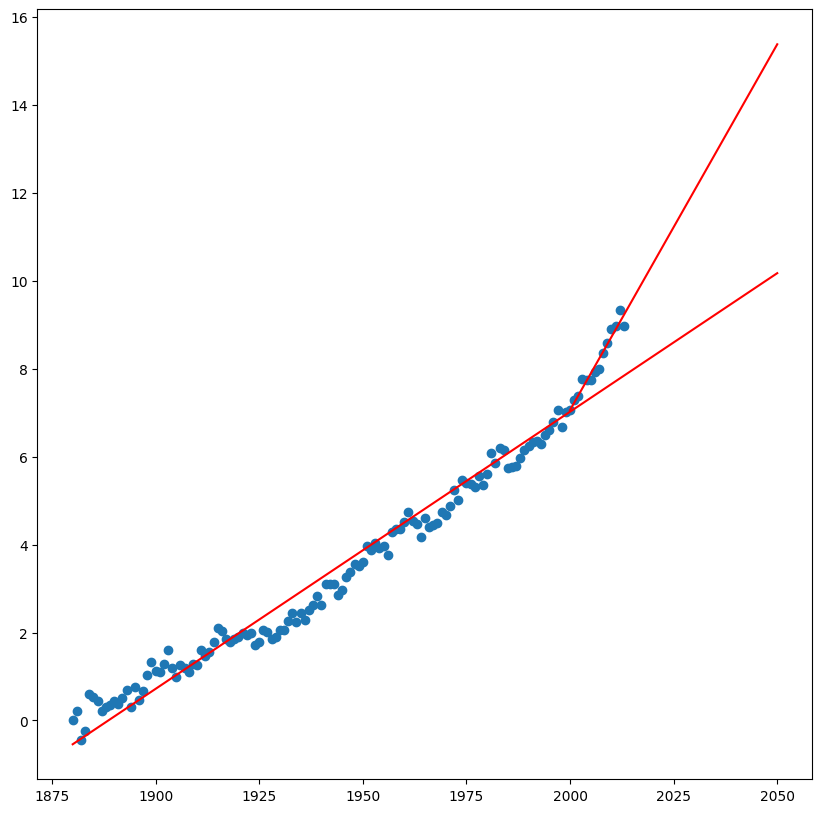

In [5]:
# Range going from 2000 to the last year available
year_span2 = range(2000, df.index[-1]+1, 1)
slope, intercept, r, p, se = linregress(year_span2, df.loc[2000:]["CSIRO Adjusted Sea Level"])
# Range going from 2000 to 2050
year_span3 = range(2000, 2051, 1)
ax.plot(year_span3, (intercept+slope*year_span3), "r")
fig

Add labels and title

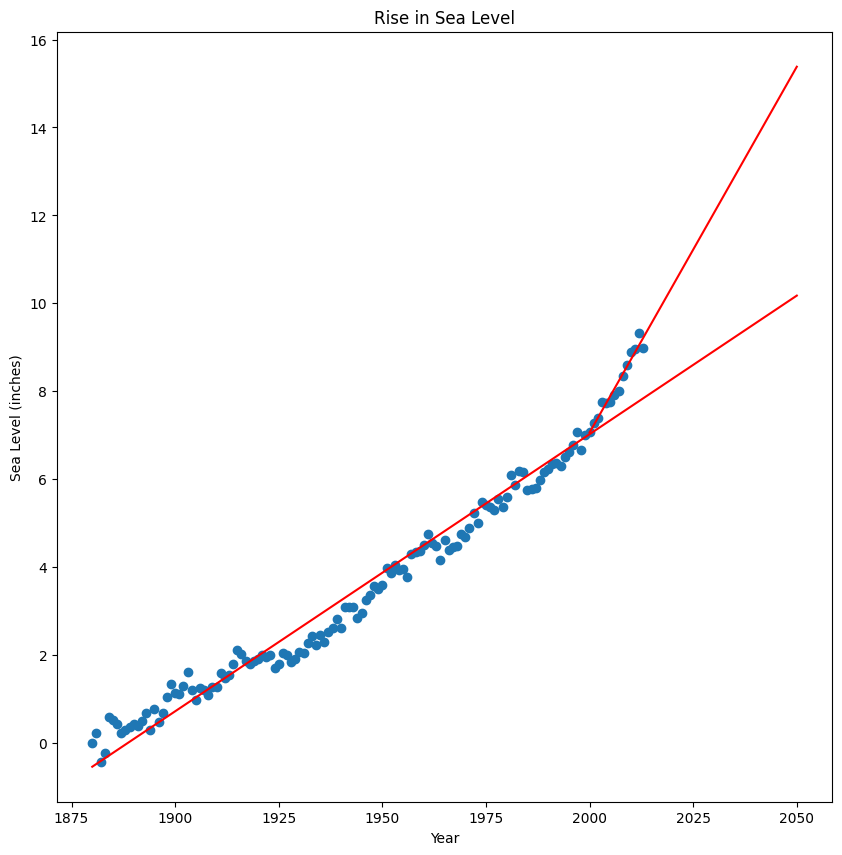

In [6]:
ax.set_title("Rise in Sea Level")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
fig